Suponga que se tiene 1 mol de oxígeno a 300K y 1atm en un volumen cúbico calcular:

- (a)  El lado del cubo
- (b)  Las velocidades media, cuadrática media y la más probable de las partículas.
- (c)  ¿qué puede decir de lo anterior?  ¿La distribución es normal?
- (d)  La fuerza que se ejerce sobre una pared de la caja. Calcule de manera macroscópica y plantee (y si puede calcule) como debería hacer este calculo usando la teoría cinética suponiendo choques perfectamente elásticos.

In [36]:
### Constantes

NA = 6.0221415e23 # Número de Avogadro
Mol = NA * 10**23 # Mol
MMo = 0.0159994   # Masa molar de átomo de oxígeno
MMo2 = 2 * MMo    # Masa molar de átomo de O₂
Mo2 = MMo2 / NA   # Masa de molécula de O₂
k = 1.3806488e-23 # Constante de Boltzmann

### Datos del Problema

T = 300     # Temperatura en Kelvin
p = 101325  # Presion en atm, 1 atm = 1.013 × 10^5 Pa
n_mols = 1  # Número de moles

# Constante de los gases
R = 8.3144621  # J / (Mol · K)

## a) Lado del cubo

Utilizando la ecuación del gas ideal (18.3)

$$
pV = nRT
$$

In [37]:
V = n_mols * R * T / p
lado = V ** (1/3)

print(f'El gas ocupa un volúmen de {V:.3f} m³ en forma de cubo.')
print(f'Dicho cubo tiene un lado de {lado:.3f} m.')

El gas ocupa un volúmen de 0.025 m³ en forma de cubo.
Dicho cubo tiene un lado de 0.291 m.


Utilizando la ecuación de van der Waals (18.7)
$$
\left(p + \frac{an^2}{V^2}\right)(V - nb) = n R T
$$

donde $a = 1.383 \frac{J\cdot m^3}{mol^2}$ y $b = 0.03186 \frac{m^3}{mol}$.

In [38]:
import sympy

# https://en.wikipedia.org/wiki/Van_der_Waals_constants_(data_page)
a = 1.383
b = 0.03186

# variable objetivo
var_V = sympy.symbols('V')

# ecuación 18.7
expr = sympy.Eq(
    (p + a * n_mols ** 2 / var_V **2) * (var_V - n_mols * b),
    n_mols * R * T
)

# resolvemos para V
V = sympy.solve(expr, var_V)[0]

print(f'El gas ocupa un volúmen de {V:.3f} m³ en forma de cubo.')
print(f'Dicho cubo tiene un lado de {V ** (1/3):.3f} m.')

El gas ocupa un volúmen de 0.056 m³ en forma de cubo.
Dicho cubo tiene un lado de 0.383 m.


## b) Velocidades

Usando la ecuación 18.36 en terminos de M y R, sabemos que la velocidad

cuadratica media es:

$$
v_{rms} = \sqrt{\frac{3RT}{M}}
$$



In [39]:
smv = (3 * R * T / MMo2)**(1/2)
print(f'Velocidad cuadrática media: {smv:.3f} m/s')

Velocidad cuadrática media: 483.584 m/s


Para calcular la velocidad media hay que usar la distribucion de Maxwell-Boltzmann e intregrar:

$$
\int_{0}^{\infty} v f(v) \, dv
$$

Con lo cual luego de intregrar se llega a la ecuacion 18.35:

$$
v_{med} = \sqrt{\frac{8kT}{\pi m}}
$$

Que ademas se puede escribir en terminos de M y R:

$$
v_{med} = \sqrt{\frac{8RT}{\pi M}}
$$


In [40]:
from math import pi,sqrt
vm = sqrt( (8 * R * T) / (pi * MMo2))
print(f'Velocidad media: {vm:.3f} m/s')

Velocidad media: 445.534 m/s


Para la velocidad más probable utilizamos la ecuación 18.34

$$
v_{mp} = \sqrt{\frac{2kT}{m}}
$$

Que también puede ser expresada en términos de los datos que ya hemos definido como

$$
v_{mp} = \sqrt{\frac{2RT}{M}}
$$


In [41]:
mpv = sqrt(2 * R * T / MMo2)
print(f'Velocidad más probable: {mpv:.3f} m/s')

Velocidad más probable: 394.844 m/s


## c)
La distribución de probabilidad de las velocidades responde a la función de Maxwell-Boltzmann:

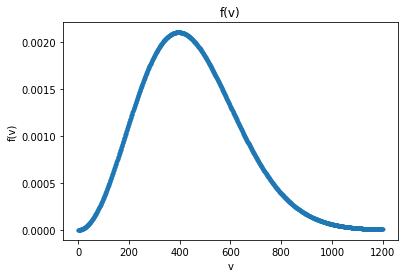

In [42]:
import numpy as np
from matplotlib import pyplot as plt
from math import e

v = np.arange(0., 1200., dtype='float')
coef1 = 4 * pi * (Mo2 / (2 * pi * k * T)) ** (3/2)
p_v = coef1 * (v ** 2) * e ** (-Mo2 * v ** 2 / (2 * k * T))

plt.figure()
plt.plot(v, p_v, '.')
plt.title('f(v)')
plt.xlabel('v')
plt.ylabel('f(v)')
plt.show()


Esta distribución no podría ser una distribución Normal, ya que no es simétrica.

Su fórmula es:
$$
f(v) = 4{\pi} \left(\frac{m}{2{\pi}kT}\right)^\frac{3}{2} v^2 e^\frac{-mv^2}{2kT}
$$

Las velocidades de las partículas en cada eje (pensadas como variables aleatorias),$v_{x}, v_{y}, v_{z}$ siguen

una distribución normal con varianza $mkT$, y $f(v)$ es el módulo de la velocidad (en los tres ejes).

## d) Fuerza sobre una pared de la caja

Utilizamos

$$
p = \frac{F}{A}
$$

In [43]:
# area de una cara
A = lado ** 2

F = p * A

print(f'El gas ejerce una fuerza de {F:.3f} N')

El gas ejerce una fuerza de 8574.507 N
